In [256]:
!python --version

Python 3.10.12


In [257]:
import pandas as pd
import warnings
import re

In [258]:
warnings.filterwarnings("ignore")

In [259]:
df=pd.read_csv(r'/kaggle/input/modelll/Datathon_TrainData_org.csv')

In [260]:
dft=pd.read_csv(r'/kaggle/input/modelll/TestData_org.csv')

In [261]:
summary=df.info()
print(summary)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1617 entries, 0 to 1616
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Country               1614 non-null   object
 1   Date                  1614 non-null   object
 2   Speaker               1613 non-null   object
 3   Headline              1612 non-null   object
 4   Text_of_Speech        1611 non-null   object
 5   Designation           1605 non-null   object
 6   Running President/PM  1605 non-null   object
 7   Speech Link           1605 non-null   object
 8   Emotion               1605 non-null   object
 9   Context               1605 non-null   object
dtypes: object(10)
memory usage: 126.5+ KB
None


# dropping unwanted rows

In [262]:
dft = dft.drop(columns=['Unnamed: 8','Country', 'Date','Speaker','Headline','Running President/PM','Designation','Speech Link','Context'])

In [263]:
df = df.drop(columns=['Country', 'Date','Speaker','Headline','Running President/PM','Designation','Speech Link','Context'])

In [264]:
dft

,Text_of_Speech
0,"Good evening, everybody. Please have a seat. ..."
1,"Colleagues, we are meeting out of schedule tod..."
2,"Now, one other thing I want to point out -- so..."
3,"Good afternoon, everyone. I just had the oppo..."
4,"Well, I’ve got my team here to talk about Ebo..."
...,...
397,THE PRESIDENT: Thank you. Thank you very muc...
398,"Good afternoon, dear colleagues,\n\nToday we a..."
399,"Colleagues, welcome to this traditional meetin..."
400,"Hi everybody. Right now, the United States S..."


# checking null count in each column in df

In [265]:
null_counts = df.isnull().sum()
print("Null counts for each column:")
print(null_counts)

Null counts for each column:
Text_of_Speech     6
Emotion           12
dtype: int64


# labels cleaning

In [266]:
df['Emotion'].isnull().sum()

12

In [267]:
labels=df['Emotion'].unique()

In [268]:
labels

array(['UPSET', 'OPTIMISM', 'NEUTRAL', 'JOY', nan], dtype=object)

In [269]:
df= df.dropna(subset=['Emotion'])

In [270]:
labels=df['Emotion'].unique()

In [271]:
labels

array(['UPSET', 'OPTIMISM', 'NEUTRAL', 'JOY'], dtype=object)

In [272]:
df['Emotion'].isnull().sum()

0

# encode labels

In [273]:
from sklearn.preprocessing import LabelEncoder

In [274]:
label_encoder = LabelEncoder()
df['Emotion'] = label_encoder.fit_transform(df['Emotion'])

In [275]:
df

,Text_of_Speech,Emotion
0,"Esteemed Mr Lebedev,\n\nLadies and Gentlemen:\...",3
1,"THE PRESIDENT: Good evening, my fellow Americ...",2
2,"Good afternoon, dear colleagues,\n\nOur meetin...",1
3,"Good afternoon, everybody. This sound system i...",1
4,More Americans voted in the 2020 elections tha...,3
...,...,...
1612,Good afternoon I have just been to see Her Maj...,2
1613,"This February, during Black History Month, I c...",2
1614,Thank you so much. Everybody have a seat. We...,1
1615,"Colleagues,\nFriends,\n\nIn 2013, President Xi...",0


# text null values

In [276]:
df[df['Text_of_Speech']=="NaN"].isnull().sum()

Text_of_Speech    0.0
Emotion           0.0
dtype: float64

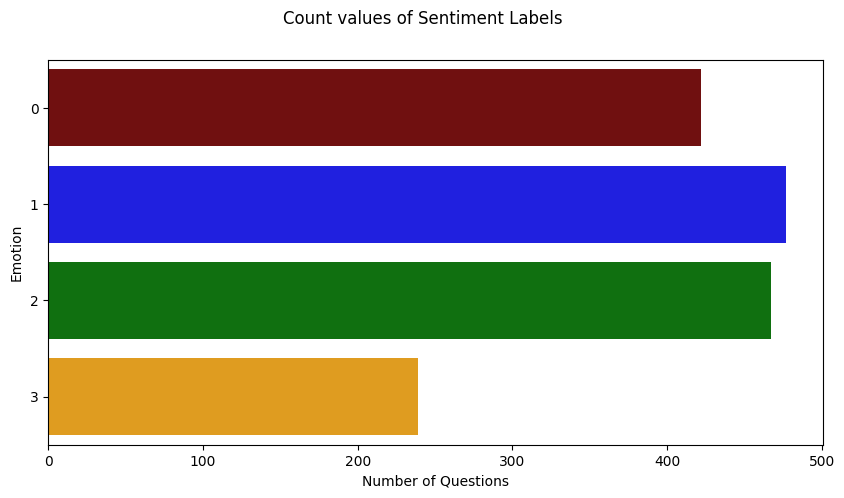

In [277]:
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import countplot
from matplotlib.pyplot import suptitle
%matplotlib inline
# Create the count plot
plt.figure(figsize=(10, 5))
sns.countplot(y="Emotion", palette=['maroon', 'blue', 'green', 'orange'], data=df)
plt.suptitle("Count values of Sentiment Labels")
plt.xlabel("Number of Questions")
plt.show()

# preprocessing of Text_of_Speech

# convert to lower

In [278]:
def lower(x):
    return x.lower()
df['Text_of_Speech']=df['Text_of_Speech'].apply(lower)   
dft['Text_of_Speech']=dft['Text_of_Speech'].apply(lower)

In [279]:
dft

,Text_of_Speech
0,"good evening, everybody. please have a seat. ..."
1,"colleagues, we are meeting out of schedule tod..."
2,"now, one other thing i want to point out -- so..."
3,"good afternoon, everyone. i just had the oppo..."
4,"well, i’ve got my team here to talk about ebo..."
...,...
397,the president: thank you. thank you very muc...
398,"good afternoon, dear colleagues,\n\ntoday we a..."
399,"colleagues, welcome to this traditional meetin..."
400,"hi everybody. right now, the united states s..."


# replace emojis with words if present

In [280]:
# from emot.emo_unicode import UNICODE_EMOJI
# # Function for converting emojis into word
# def convert_emojis(text):
#     for emot in UNICODE_EMOJI:
#         text = text.replace(emot, "_".join(UNICODE_EMOJI[emot].replace(",","").replace(":","").split()))
#     return text  
# df['Text_of_Speech'] = df['Text_of_Speech'].apply(convert_emojis)
# dft['Text_of_Speech'] = dft['Text_of_Speech'].apply(convert_emojis)

In [281]:
dft

,Text_of_Speech
0,"good evening, everybody. please have a seat. ..."
1,"colleagues, we are meeting out of schedule tod..."
2,"now, one other thing i want to point out -- so..."
3,"good afternoon, everyone. i just had the oppo..."
4,"well, i’ve got my team here to talk about ebo..."
...,...
397,the president: thank you. thank you very muc...
398,"good afternoon, dear colleagues,\n\ntoday we a..."
399,"colleagues, welcome to this traditional meetin..."
400,"hi everybody. right now, the united states s..."


# tokenize

In [282]:
from nltk.tokenize import word_tokenize
def tokenize(x):
    return word_tokenize(x)
df['Text_of_Speech']=df['Text_of_Speech'].apply(tokenize)
dft['Text_of_Speech']=dft['Text_of_Speech'].apply(tokenize)

In [283]:
dft

,Text_of_Speech
0,"[good, evening, ,, everybody, ., please, have,..."
1,"[colleagues, ,, we, are, meeting, out, of, sch..."
2,"[now, ,, one, other, thing, i, want, to, point..."
3,"[good, afternoon, ,, everyone, ., i, just, had..."
4,"[well, ,, i, ’, ve, got, my, team, here, to, t..."
...,...
397,"[the, president, :, thank, you, ., thank, you,..."
398,"[good, afternoon, ,, dear, colleagues, ,, toda..."
399,"[colleagues, ,, welcome, to, this, traditional..."
400,"[hi, everybody, ., right, now, ,, the, united,..."


# remove punctuations

In [284]:
def remove_punct(x):
    import string
    punct_tag=set(string.punctuation)
    t=[i for i in x if i not in punct_tag]
    return t
      
df['Text_of_Speech']=df['Text_of_Speech'].apply(remove_punct)
dft['Text_of_Speech']=dft['Text_of_Speech'].apply(remove_punct)

In [285]:
dft

,Text_of_Speech
0,"[good, evening, everybody, please, have, a, se..."
1,"[colleagues, we, are, meeting, out, of, schedu..."
2,"[now, one, other, thing, i, want, to, point, o..."
3,"[good, afternoon, everyone, i, just, had, the,..."
4,"[well, i, ’, ve, got, my, team, here, to, talk..."
...,...
397,"[the, president, thank, you, thank, you, very,..."
398,"[good, afternoon, dear, colleagues, today, we,..."
399,"[colleagues, welcome, to, this, traditional, m..."
400,"[hi, everybody, right, now, the, united, state..."


# remove extra white spaces

In [286]:
def whites(x):
    w={' '}
    x=[i for i in x if i not in w]
    return x
df['Text_of_Speech']=df['Text_of_Speech'].apply(whites)    
dft['Text_of_Speech']=dft['Text_of_Speech'].apply(whites)    

In [287]:
dft

,Text_of_Speech
0,"[good, evening, everybody, please, have, a, se..."
1,"[colleagues, we, are, meeting, out, of, schedu..."
2,"[now, one, other, thing, i, want, to, point, o..."
3,"[good, afternoon, everyone, i, just, had, the,..."
4,"[well, i, ’, ve, got, my, team, here, to, talk..."
...,...
397,"[the, president, thank, you, thank, you, very,..."
398,"[good, afternoon, dear, colleagues, today, we,..."
399,"[colleagues, welcome, to, this, traditional, m..."
400,"[hi, everybody, right, now, the, united, state..."


# stopwords

In [288]:
from nltk.corpus import stopwords
import nltk
def re_stop(x):
    nltk_stopwords = nltk.corpus.stopwords.words("english")
    return [ token for token in x if token not in nltk_stopwords]
df['Text_of_Speech']=df['Text_of_Speech'].apply(re_stop)  
dft['Text_of_Speech']=dft['Text_of_Speech'].apply(re_stop) 

In [289]:
dft

,Text_of_Speech
0,"[good, evening, everybody, please, seat, miche..."
1,"[colleagues, meeting, schedule, today, obvious..."
2,"[one, thing, want, point, --, power, africa, i..."
3,"[good, afternoon, everyone, opportunity, greet..."
4,"[well, ’, got, team, talk, ebola, want, make, ..."
...,...
397,"[president, thank, thank, much, ryan, want, th..."
398,"[good, afternoon, dear, colleagues, today, exa..."
399,"[colleagues, welcome, traditional, meeting, fi..."
400,"[hi, everybody, right, united, states, senate,..."


# Removes Numbers

In [290]:
def remove_num(data):
    data=' '.join(data)
    tag=re.compile(r'[0-9]+')
    data=tag.sub(r' ',data)
    return data
df['Text_of_Speech']=df['Text_of_Speech'].apply(remove_num)
dft['Text_of_Speech']=dft['Text_of_Speech'].apply(remove_num) 

In [291]:
dft

,Text_of_Speech
0,good evening everybody please seat michelle pl...
1,colleagues meeting schedule today obvious reas...
2,one thing want point -- power africa initiativ...
3,good afternoon everyone opportunity greet pers...
4,well ’ got team talk ebola want make mention h...
...,...
397,president thank thank much ryan want thank bea...
398,good afternoon dear colleagues today examining...
399,colleagues welcome traditional meeting first w...
400,hi everybody right united states senate debati...


# remove roamns if present

In [292]:
def remove_roman(data):
    en_tag =re.compile(r'^M{0,4}(CM|CD|D?C{0,3})(XC|XL|L?X{0,3})(IX|IV|V?I{0,3})$')
    data=en_tag.sub(r' ',data)
    return data
df['Text_of_Speech']=df['Text_of_Speech'].apply(remove_roman)
dft['Text_of_Speech']=dft['Text_of_Speech'].apply(remove_roman)

In [293]:
dft

,Text_of_Speech
0,good evening everybody please seat michelle pl...
1,colleagues meeting schedule today obvious reas...
2,one thing want point -- power africa initiativ...
3,good afternoon everyone opportunity greet pers...
4,well ’ got team talk ebola want make mention h...
...,...
397,president thank thank much ryan want thank bea...
398,good afternoon dear colleagues today examining...
399,colleagues welcome traditional meeting first w...
400,hi everybody right united states senate debati...


# Remove redundant words

In [294]:
def remove_redun(data):
    red_tag=re.compile(r'[?<=(  )\\]|[&&|\|\|-]')
    data=red_tag.sub(r' ',data)
    data=data.split(" ")
    return data
df['Text_of_Speech']=df['Text_of_Speech'].apply(remove_redun)
dft['Text_of_Speech']=dft['Text_of_Speech'].apply(remove_redun)

In [295]:
dft

,Text_of_Speech
0,"[good, evening, everybody, please, seat, miche..."
1,"[colleagues, meeting, schedule, today, obvious..."
2,"[one, thing, want, point, , , , power, africa,..."
3,"[good, afternoon, everyone, opportunity, greet..."
4,"[well, ’, got, team, talk, ebola, want, make, ..."
...,...
397,"[president, thank, thank, much, ryan, want, th..."
398,"[good, afternoon, dear, colleagues, today, exa..."
399,"[colleagues, welcome, traditional, meeting, fi..."
400,"[hi, everybody, right, united, states, senate,..."


# stemming

In [296]:
from nltk.stem.porter import PorterStemmer
def stemm(x):
    l=[]
    for i in x:
        l.append(PorterStemmer().stem(i))
    return l    
df['Text_of_Speech']=df['Text_of_Speech'].apply(stemm)
dft['Text_of_Speech']=dft['Text_of_Speech'].apply(stemm)

In [297]:
dft

,Text_of_Speech
0,"[good, even, everybodi, pleas, seat, michel, p..."
1,"[colleagu, meet, schedul, today, obviou, reaso..."
2,"[one, thing, want, point, , , , power, africa,..."
3,"[good, afternoon, everyon, opportun, greet, pe..."
4,"[well, ’, got, team, talk, ebola, want, make, ..."
...,...
397,"[presid, thank, thank, much, ryan, want, thank..."
398,"[good, afternoon, dear, colleagu, today, exami..."
399,"[colleagu, welcom, tradit, meet, first, would,..."
400,"[hi, everybodi, right, unit, state, senat, deb..."


# lemmatiazation

technique that reduces words to their base or dictionary form, ensuring variants of a word are transformed to a common root. 

In [298]:
# from nltk.stem import WordNetLemmatizer
# def lemm(x):
#     l=[]
#     for i in x:
#         l.append(WordNetLemmatizer().lemmatize(i))
#     return l    
# df['Text_of_Speech']=df['Text_of_Speech'].apply(lemm)
# dft['Text_of_Speech']=dft['Text_of_Speech'].apply(lemm)

In [299]:
# dft

# combine again to speech

In [300]:
def combine(x):
    return ' '.join(x)
df['Text_of_Speech']=df['Text_of_Speech'].apply(combine)
dft['Text_of_Speech']=dft['Text_of_Speech'].apply(combine)

In [301]:
dft

,Text_of_Speech
0,good even everybodi pleas seat michel pleas jo...
1,colleagu meet schedul today obviou reason name...
2,one thing want point power africa initi lev...
3,good afternoon everyon opportun greet person w...
4,well ’ got team talk ebola want make mention h...
...,...
397,presid thank thank much ryan want thank beauti...
398,good afternoon dear colleagu today examin issu...
399,colleagu welcom tradit meet first would like e...
400,hi everybodi right unit state senat debat bipa...


# TF-IDF

In [302]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=1000)  
# X=tfidf.fit_transform(df['Text_of_Speech']).toarray()
XT=tfidf.fit_transform(dft['Text_of_Speech']).toarray()

In [303]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
global X_train, X_test, y_train, y_test 
X_train, X_test, y_train, y_test = train_test_split(df['Text_of_Speech'],df['Emotion'], test_size=0.2)

In [304]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.feature_extraction.text import TfidfVectorizer

In [305]:
X_train_tfidf.shape[1]

1000

In [315]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense, Dropout
from sklearn.feature_extraction.text import TfidfVectorizer

In [317]:
X_train_tfidf = tfidf.fit_transform(X_train).toarray()
X_test_tfidf = tfidf.transform(X_test).toarray()

# Define the BiLSTM model
model = Sequential()
model.add(Bidirectional(LSTM(units=128, return_sequences=True), input_shape=(X_train_tfidf.shape[1], 1)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(units=128)))
model.add(Dropout(0.2))
model.add(Dense(units=4, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
model.summary()



Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_2 (Bidirectio  (None, 1000, 256)        133120    
 nal)                                                            
                                                                 
 dropout_10 (Dropout)        (None, 1000, 256)         0         
                                                                 
 bidirectional_3 (Bidirectio  (None, 256)              394240    
 nal)                                                            
                                                                 
 dropout_11 (Dropout)        (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 4)                 1028      
                                                                 
Total params: 528,388
Trainable params: 528,388
Non-tr

In [321]:
X_train_tfidf = tfidf.fit_transform(X_train).toarray()
X_test_tfidf = tfidf.transform(X_test).toarray()

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=128, input_shape=(X_train_tfidf.shape[1], 1), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=128))
model.add(Dropout(0.2))
model.add(Dense(units=4, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 1000, 128)         66560     
                                                                 
 dropout_12 (Dropout)        (None, 1000, 128)         0         
                                                                 
 lstm_13 (LSTM)              (None, 128)               131584    
                                                                 
 dropout_13 (Dropout)        (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 4)                 516       
                                                                 
Total params: 198,660
Trainable params: 198,660
Non-trainable params: 0
_________________________________________________________________


In [322]:
from tensorflow.keras.utils import to_categorical

# One-hot encode your emotion labels (y_train and y_test)
y_train_one_hot = to_categorical(y_train, num_classes=4)
y_test_one_hot = to_categorical(y_test, num_classes=4)

In [325]:
# Train the model
model.fit(X_train_tfidf, y_train_one_hot, epochs=10, batch_size=32)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_tfidf, y_test_one_hot)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

Epoch 1/10
41/41 [==============================] - 4s 89ms/step - loss: 1.3609 - accuracy: 0.2967
Epoch 2/10
41/41 [==============================] - 4s 89ms/step - loss: 1.3619 - accuracy: 0.2944
Epoch 3/10
41/41 [==============================] - 4s 90ms/step - loss: 1.3627 - accuracy: 0.2983
Epoch 4/10
41/41 [==============================] - 4s 94ms/step - loss: 1.3597 - accuracy: 0.2928
Epoch 5/10
41/41 [==============================] - 4s 90ms/step - loss: 1.3585 - accuracy: 0.2991
Epoch 6/10
41/41 [==============================] - 4s 89ms/step - loss: 1.3599 - accuracy: 0.3100
Epoch 7/10
41/41 [==============================] - 4s 88ms/step - loss: 1.3612 - accuracy: 0.2780
Epoch 8/10
41/41 [==============================] - 4s 90ms/step - loss: 1.3608 - accuracy: 0.2936
Epoch 9/10
41/41 [==============================] - 4s 89ms/step - loss: 1.3597 - accuracy: 0.2889
Epoch 10/10
11/11 [==============================] - 1s 47ms/step - loss: 1.3446 - accuracy: 0.3115
Test Loss

In [ ]:
from sklearn.svm import SVC
rf_kn =SVC()
rf_model_kn = rf_kn.fit(X_train, y_train)
y_pred = rf_model_kn.predict(X_test)
score1=classification_report(y_test, y_pred)
# print(y_pred)

In [ ]:
y_predt = rf_model_kn.predict(XT)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
rf_kn = DecisionTreeClassifier()
rf_model_kn = rf_kn.fit(X_train, y_train)
y_pred = rf_model_kn.predict(X_test)
score1=classification_report(y_test, y_pred)
print(score1)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_kn = RandomForestClassifier()
rf_model_kn = rf_kn.fit(X_train, y_train)
y_pred = rf_model_kn.predict(X_test)
score1=classification_report(y_test, y_pred)
print(score1)

In [ ]:
from sklearn.linear_model import LogisticRegression
model_l=LogisticRegression().fit(X_train,y_train)
y_pred=model_l.predict(X_test)
score=classification_report(y_test, y_pred)
print(score)

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
score1=classification_report(y_test, y_pred)
print(score1)

In [ ]:
# from sklearn.neural_network import MLPClassifier
# from sklearn.ensemble import StackingClassifier
# from sklearn.neighbors import KNeighborsClassifier

# estimator_list = [
#         ("knn", KNeighborsClassifier()),
#         ("svm_rbf", SVC()),
#         ("dt", DecisionTreeClassifier()),
#         ("rf", RandomForestClassifier()),
#         ("mlp", MLPClassifier(alpha=1, max_iter=1000)),
#     ]
# stack_model = StackingClassifier(
#         estimators=estimator_list, final_estimator=LogisticRegression()
#     )
# stack_model.fit(X_train, y_train)
# y_pred = stack_model.predict(X_test)
# score = classification_report(y_test, y_pred)
# print(score)

In [ ]:
import xgboost as xgb
xgb_model = xgb.XGBRegressor(objective="multi:softmax", num_class=4,random_state=42)
xgb_model.fit(X_train, y_train)
y_pred=xgb_model.predict(X_test)
score1=classification_report(y_test,y_pred.round())
print(score1)